<h1><b>POSTTEST 4</b></h1>
<h2>Kecerdasan buatan</h2>
<p>Nama : Tegar Fitrah Naba Atthoriq<br>NIM : 2009106085</p>
<hr>

<h2><b>Data Preprocessing</b></h2>

<p>memanggil package dan dataset</p>

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [33]:
dataset = pd.read_csv('Airbnb_Open_Data.csv')
dataset.head(5)

C:\Users\Tegar\AppData\Local\Temp\ipykernel_34292\3172808021.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


<h3><b>1. Splitting Data</b></h3>
<p>
    dengan proporsi training dan testing sebesar 70:30 
</p>


In [34]:
data_X = dataset[['neighbourhood group','neighbourhood','country','service fee','minimum nights','availability 365']]
label_Y = dataset['license']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(data_X, label_Y, test_size=.2)

In [36]:
print(f'the length of data train is {len(x_train)} row',
      f'the length of label train is {len(y_train)} row',
      f'the length of data test is {len(x_test)} row',
      f'the length of label test is {len(y_test)} row',
      f'the length of total dataset is {len(dataset)} row',
      sep='\n')

the length of data train is 82079 row
the length of label train is 82079 row
the length of data test is 20520 row
the length of label test is 20520 row
the length of total dataset is 102599 row


<h3><b>2. Normalisasi dan Standarisasi Data</b></h3>



In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
dataset_normalization = dataset.copy()
scaler = MinMaxScaler()


normalize_dataset = scaler.fit_transform(dataset_normalization[['lat', 'long', 'number of reviews', 'review rate number']])
normalize_dataset = pd.DataFrame(normalize_dataset)
normalize_dataset.rename(columns={0:'lat', 1:'long', 2:'number of reviews', 3:'review rate number'}, inplace=True)

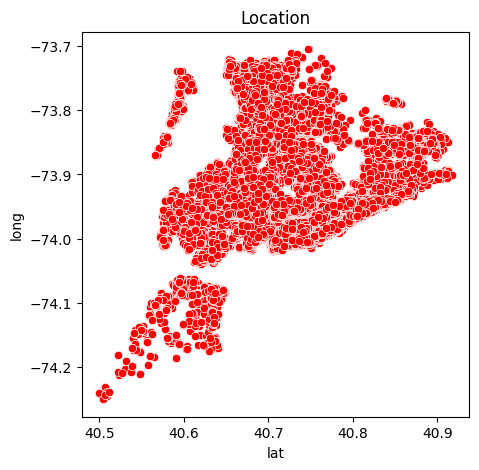

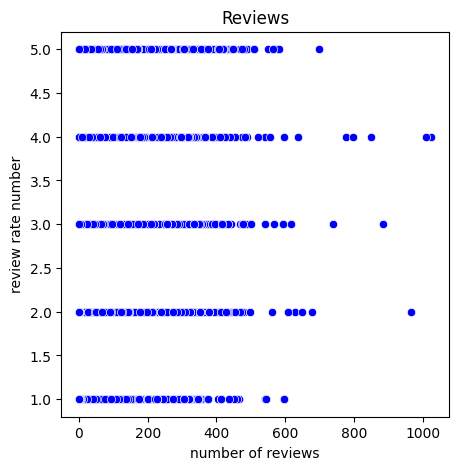

In [39]:
plt.figure(1, figsize=(5,5))
sns.scatterplot(dataset_normalization, x='lat', y='long', color='red')
plt.title('Location')
plt.xlabel('lat')
plt.ylabel('long')

plt.figure(2, figsize=(5,5))
sns.scatterplot(dataset_normalization, x='number of reviews', y='review rate number', color='blue')
plt.title('Reviews')
plt.xlabel('number of reviews')
plt.ylabel('review rate number')
plt.show()

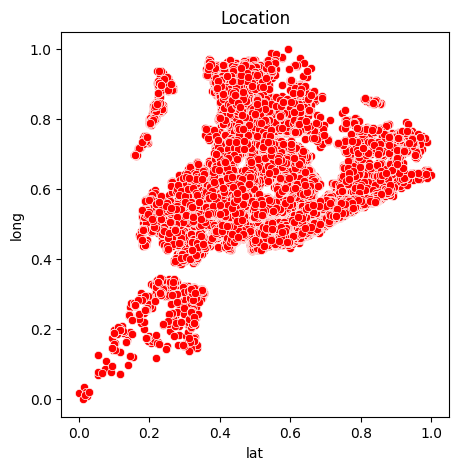

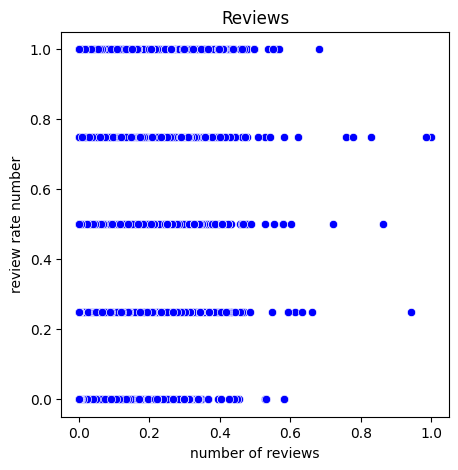

In [40]:
plt.figure(1, figsize=(5,5))
sns.scatterplot(normalize_dataset, x='lat', y='long', color='red')
plt.title('Location')
plt.xlabel('lat')
plt.ylabel('long')

plt.figure(2, figsize=(5,5))
sns.scatterplot(normalize_dataset, x='number of reviews', y='review rate number', color='blue')
plt.title('Reviews')
plt.xlabel('number of reviews')
plt.ylabel('review rate number')
plt.show()

In [41]:
dataset_used_standarization = dataset.copy()
dataset_used_standarization.drop('license', axis=1, inplace=True)

standart_std = StandardScaler()
scaled_data = standart_std.fit_transform(dataset_used_standarization[['lat','long','minimum nights','number of reviews','reviews per month','review rate number','calculated host listings count','availability 365']])

In [42]:
print('Dataset sebelum scalling:',dataset.drop('license', axis=1).head(6),f'Nilai standar deviasi:\n{np.std(dataset)}',sep='\n', end='\n\n')

print('Dataset setelah scalling:',scaled_data[:6],f'Nilai standar deviasi: {np.nanstd(scaled_data)}',sep='\n')

Dataset sebelum scalling:
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   
5 

c:\Users\Tegar\Praktikum_KB\Posttest_KB_2\venv\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<h3><b>3. Cleaning Data</b></h3>

<p>pada data dengan nilai null</p>

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
print(dataset.isna().sum())
dataset_copy = dataset.copy()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [46]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

In [47]:
# untuk float
dataset_copy['host id'] = imputer_mean.fit_transform(dataset_copy[['host id']])
dataset_copy['lat'] = imputer_mean.fit_transform(dataset_copy[['lat']])
dataset_copy['long'] = imputer_mean.fit_transform(dataset_copy[['long']])
dataset_copy['Construction year'] = imputer_mean.fit_transform(dataset_copy[['Construction year']])
dataset_copy['minimum nights'] = imputer_mean.fit_transform(dataset_copy[['minimum nights']])
dataset_copy['number of reviews'] = imputer_mean.fit_transform(dataset_copy[['number of reviews']])
dataset_copy['reviews per month'] = imputer_mean.fit_transform(dataset_copy[['reviews per month']])
dataset_copy['review rate number'] = imputer_mean.fit_transform(dataset_copy[['review rate number']])
dataset_copy['calculated host listings count'] = imputer_mean.fit_transform(dataset_copy[['calculated host listings count']])
dataset_copy['availability 365'] = imputer_mean.fit_transform(dataset_copy[['availability 365']])

# unuk integer
dataset_copy['host id'] = imputer_median.fit_transform(dataset_copy[['host id']])

# untuk object
dataset_copy['NAME'] = imputer_modus.fit_transform(dataset_copy[['NAME']])
dataset_copy['host_identity_verified'] = imputer_modus.fit_transform(dataset_copy[['host_identity_verified']])
dataset_copy['host name'] = imputer_modus.fit_transform(dataset_copy[['host name']])
dataset_copy['neighbourhood group'] = imputer_modus.fit_transform(dataset_copy[['neighbourhood group']])
dataset_copy['neighbourhood'] = imputer_modus.fit_transform(dataset_copy[['neighbourhood']])
dataset_copy['country'] = imputer_modus.fit_transform(dataset_copy[['country']])
dataset_copy['country code'] = imputer_modus.fit_transform(dataset_copy[['country code']])
dataset_copy['instant_bookable'] = imputer_modus.fit_transform(dataset_copy[['instant_bookable']])
dataset_copy['cancellation_policy'] = imputer_modus.fit_transform(dataset_copy[['cancellation_policy']])
dataset_copy['room type'] = imputer_modus.fit_transform(dataset_copy[['room type']])
dataset_copy['price'] = imputer_modus.fit_transform(dataset_copy[['price']])
dataset_copy['service fee'] = imputer_modus.fit_transform(dataset_copy[['service fee']])
dataset_copy['last review'] = imputer_modus.fit_transform(dataset_copy[['last review']])
dataset_copy['house_rules'] = imputer_modus.fit_transform(dataset_copy[['house_rules']])
dataset_copy['license'] = imputer_modus.fit_transform(dataset_copy[['license']])

In [48]:
dataset_copy.isna().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64

<h3><b>4. Encoding Data</b></h3>

<p>menggunakan One Hot Encoding</p>

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
dataset_encoding = dataset.copy()
encoder_oneHot = OneHotEncoder(sparse=False)

# encode the label attribute from categorical into binary
temp_dataset = encoder_oneHot.fit_transform(dataset_encoding[['license']]).astype('int32')

# reformat the dataset into dataframe
temp_dataset = pd.DataFrame(temp_dataset)

# drop the previous label attribute
dataset_encoding.drop('license', axis=1, inplace=True)
dataset_encoding1 = dataset_encoding.join(temp_dataset)
dataset_encoding1[:100]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,0,1
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,0,1
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,0,1
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",0,1
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,0,1
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1053805,Charming 1 bed GR8 WBurg LOCATION!,85349309260,NaN,Chester,Brooklyn,Williamsburg,40.70984,-73.95775,United States,...,5.0,168.0,7/22/2018,1.57,NaN,1.0,82.0,"No pets. Sorry, it takes too long to clean. N...",0,1
96,1054357,NaN,43086080920,verified,Joyce,Brooklyn,Bushwick,40.70093,-73.92609,United States,...,NaN,118.0,6/18/2019,1.05,NaN,2.0,92.0,NaN,0,1
97,1054909,NaN,8644470108,verified,Sydney,Manhattan,Upper West Side,40.79764,-73.96177,United States,...,NaN,NaN,7/7/2019,0.71,NaN,1.0,55.0,We ask that guests be respectful and considera...,0,1
98,1055461,NaN,2531706698,NaN,Victoria,Manhattan,Harlem,40.82803,-73.94731,United States,...,NaN,1.0,10/9/2018,0.11,NaN,1.0,158.0,House should be left as tidy as you found it. ...,0,1
